# Testing DeepER

### Import libraries

In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import time
import os
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
import matplotlib.pyplot as plt
import seaborn as sns
from deeper_model import build_model
from deeper_utils import preprocess_data

Using TensorFlow backend.


### Read the dataset

In [2]:
trainData, testData, valData, embeddingMatrix, wordsWithNoEmbeddings = preprocess_data(
    'Fodors_Zagats', baseDir = '.', maxSequenceLength=100)

Printing out words with no embeddings in GloVe

In [3]:
PRINT_RANGE = 30

if len(wordsWithNoEmbeddings) < PRINT_RANGE:
    PRINT_RANGE = len(wordsWithNoEmbeddings)

if PRINT_RANGE > 0:   
    for i in range(PRINT_RANGE):
        print(wordsWithNoEmbeddings[i])

print('...')
print("There are {} words with no embeddings in GloVe".format(len(wordsWithNoEmbeddings)))

petrossian
lespinasse
felidia
eril
bizou
bertolini
lutece
wollensky
hedgerose
matsuhisa
postrio
meatty
buzio
plumpjack
bistango
rondelli
seryna
yolie
manora
hillhurst
nozawa
ciboulette
fringale
menchanko
sanppo
tadich
vivande
oritalia
steuart
kintetsu
...
There are 48 words with no embeddings in GloVe


Print embedding matrix shape

In [4]:
embeddingMatrix.shape

(2075, 300)

In [5]:
leftTableTrainData, rightTableTrainData, trainLabels = trainData
leftTableTestData, rightTableTestData, testLabels = testData
leftTableValData, rightTableValData, valLabels = valData

Print training set size

In [6]:
print(leftTableTrainData.shape)
print(rightTableTrainData.shape)

(567, 100)
(567, 100)


Print test set size

In [7]:
print(leftTableTestData.shape)
print(rightTableTestData.shape)

(189, 100)
(189, 100)


Print validation set size

In [8]:
print(leftTableValData.shape)
print(rightTableValData.shape)

(190, 100)
(190, 100)


### Build the DeepER model 

In [18]:
model = build_model(embeddingMatrix, lstmUnits=75, lstm_dropout=0.1, mask_zero=True, maxSequenceLength=100)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 100, 300)     622500      input_3[0][0]                    
__________________________________________________________________________________________________
embedding_4 (Embedding)         (None, 100, 300)     622500      input_4[0][0]                    
__________________________________________________________________________________________________
bidirectio

### Plot DeepER architecture

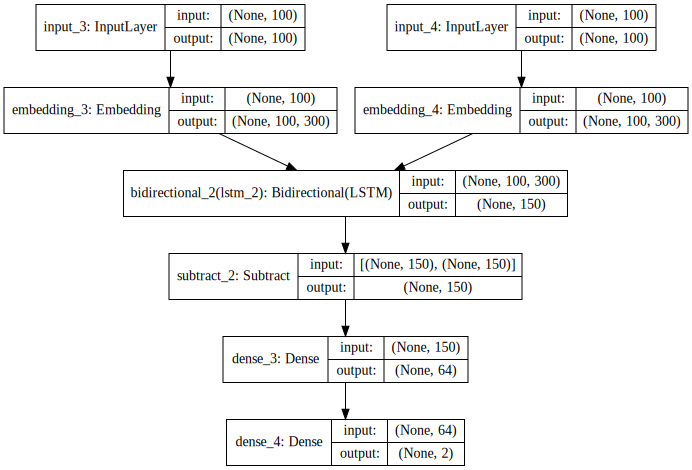

In [19]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

### Training

In [20]:
start_time = time.time()

history = model.fit([leftTableTrainData,
           rightTableTrainData],
          trainLabels,
          batch_size=256,
          epochs=20,
          validation_data=([leftTableValData,
                            rightTableValData],
                           valLabels))

elapsed_time = time.time() - start_time
t = time.strftime("%H:%M:%S", time.gmtime(elapsed_time))
print('Elapsed time (learning):', t)

Train on 567 samples, validate on 190 samples
Epoch 1/20
567/567 [==============================] - 14s 26ms/step - loss: 0.5316 - acc: 0.6896 - val_loss: 0.2587 - val_acc: 0.8842
Epoch 2/20
567/567 [==============================] - 9s 17ms/step - loss: 0.1889 - acc: 0.9030 - val_loss: 0.1704 - val_acc: 0.9263
Epoch 3/20
567/567 [==============================] - 10s 17ms/step - loss: 0.0937 - acc: 0.9753 - val_loss: 0.1768 - val_acc: 0.9211
Epoch 4/20
567/567 [==============================] - 9s 16ms/step - loss: 0.0458 - acc: 0.9824 - val_loss: 0.2439 - val_acc: 0.9000
Epoch 5/20
567/567 [==============================] - 10s 17ms/step - loss: 0.0298 - acc: 0.9877 - val_loss: 0.3485 - val_acc: 0.8842
Epoch 6/20
567/567 [==============================] - 10s 17ms/step - loss: 0.0129 - acc: 0.9982 - val_loss: 0.4373 - val_acc: 0.8789
Epoch 7/20
567/567 [==============================] - 10s 18ms/step - loss: 0.0195 - acc: 0.9912 - val_loss: 0.4087 - val_acc: 0.9053
Epoch 8/20
567/567

### Plot accuracy and loss

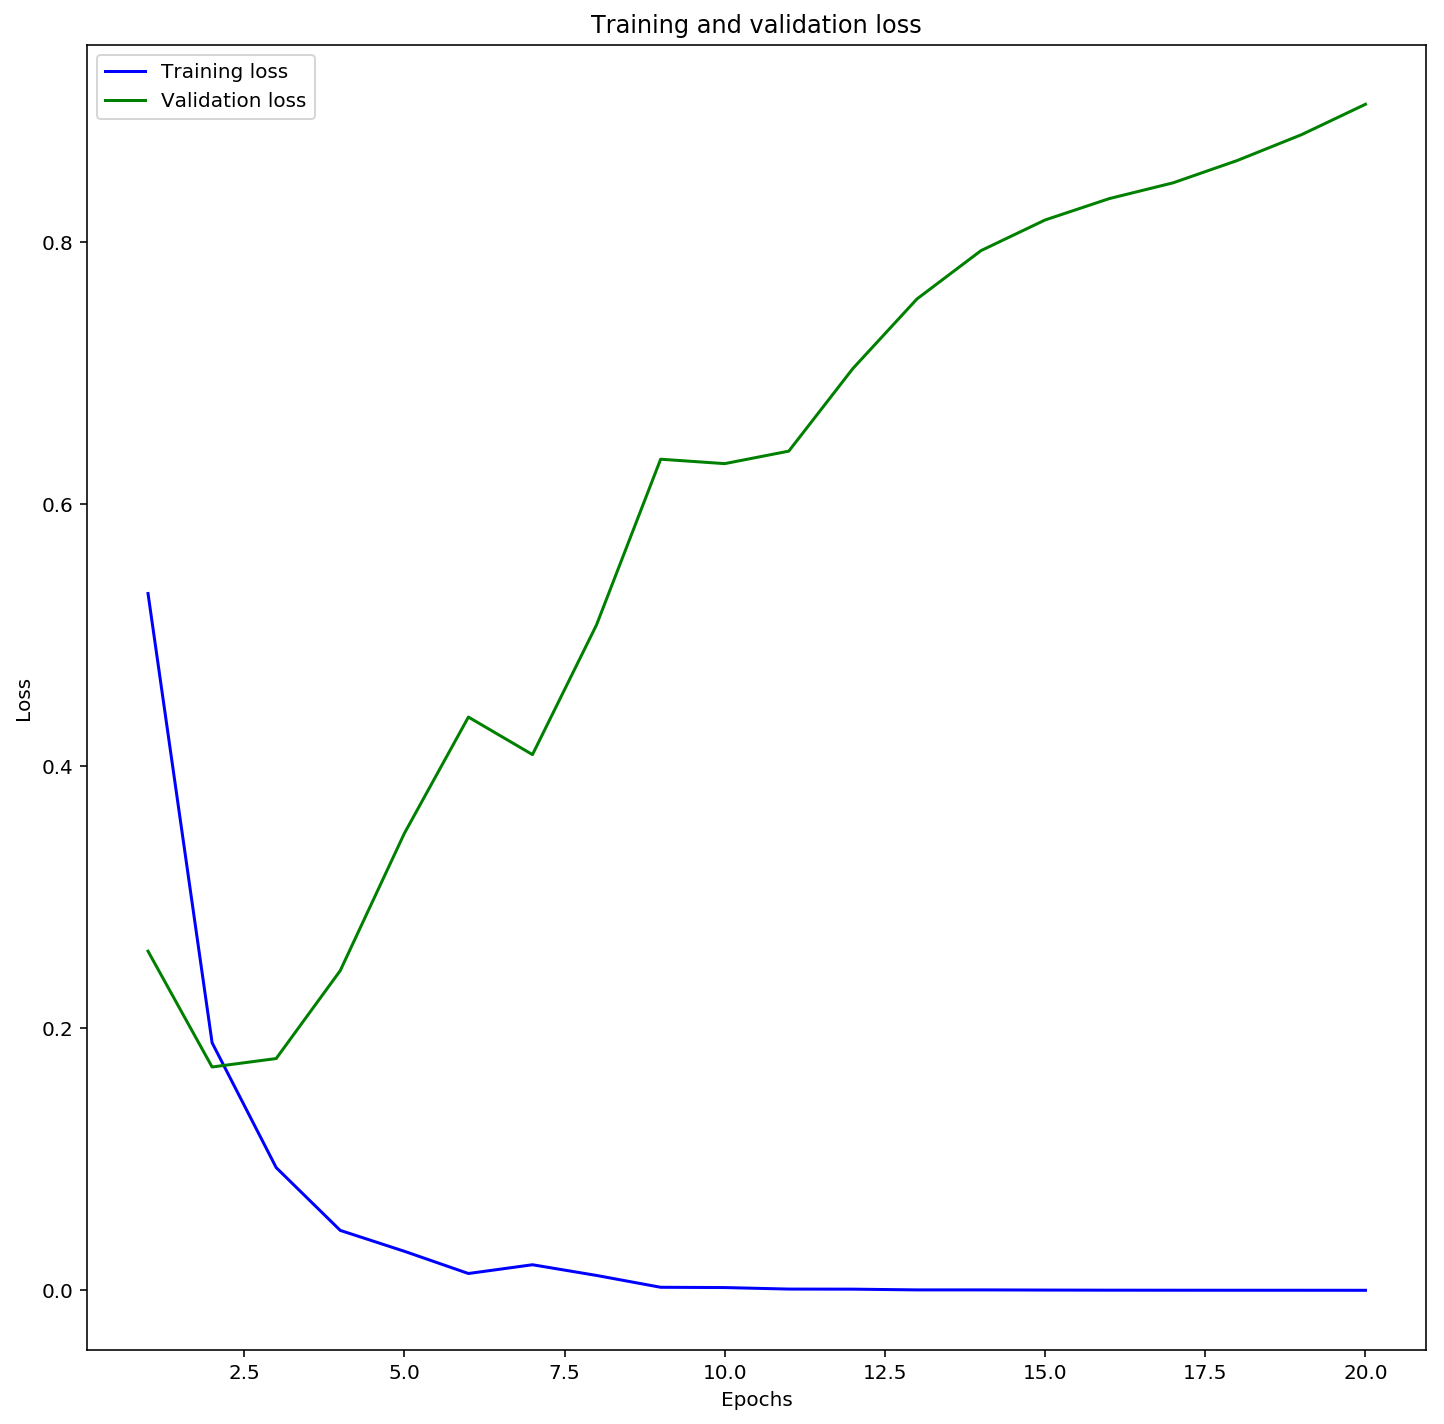

In [21]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(12,12))
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

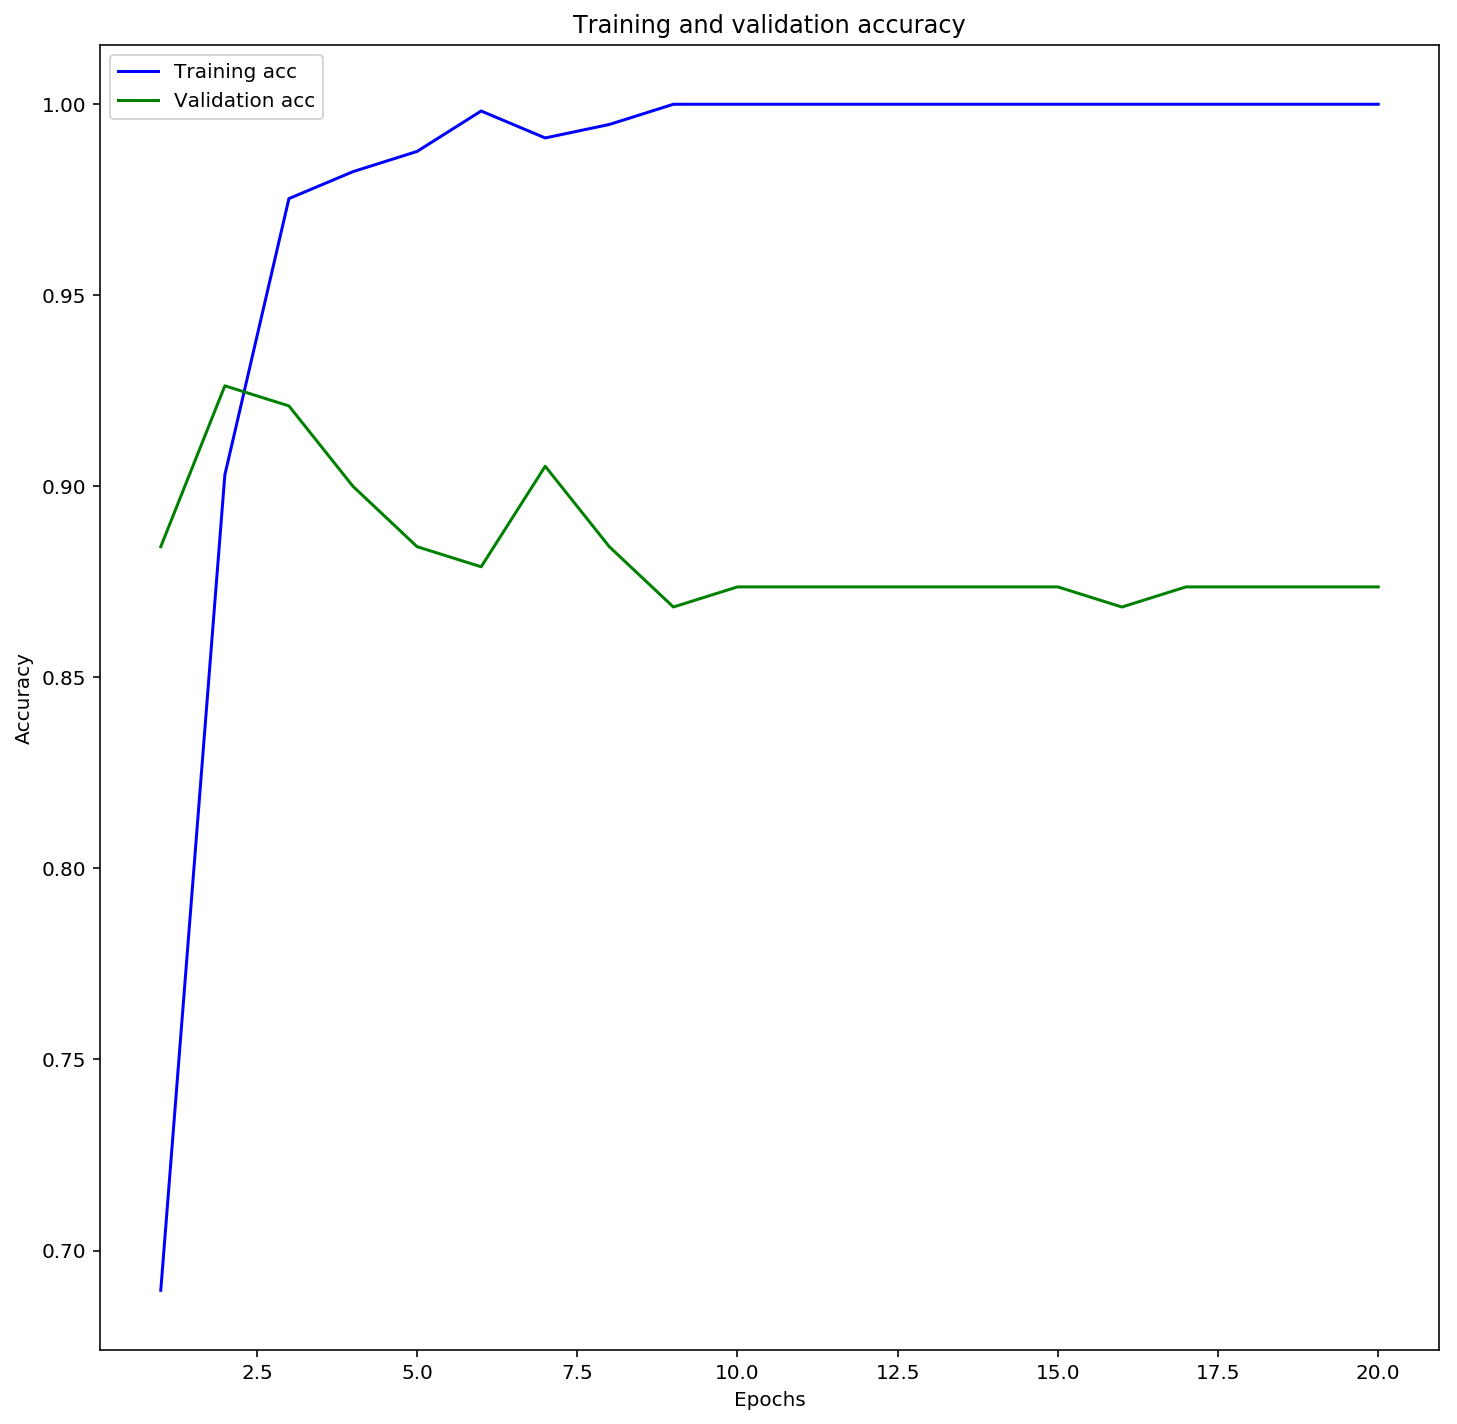

In [22]:
plt.figure(figsize=(12,12))
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'g', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

### Predict labels on test data

In [24]:
predictedLabels = model.predict(x=[leftTableTestData, rightTableTestData])
predictedLabels = predictedLabels.argmax(axis=1)
testLabels = testLabels.argmax(axis=1)

AxisError: axis 1 is out of bounds for array of dimension 1

### Compute confusion matrix

In [ ]:
cm = confusion_matrix(testLabels, predictedLabels)
fig, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(cm, annot=True, ax = ax, fmt='g', cmap='Blues')

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['non matching', 'matching'])
ax.yaxis.set_ticklabels(['non matching', 'matching'])

### Compute metrics

In [ ]:
precision, recall, fMeasure, support = precision_recall_fscore_support(testLabels, predictedLabels, average='binary')

if fMeasure is None:
    fMeasure = 0.0
if support is None:
    support = 0.0

row_format ="{:>15}" * 4
print(row_format.format('Precision', 'Recall', 'F-measure', 'Support'))
print(row_format.format(round(precision, 2), round(recall, 2), round(fMeasure,2), round(support, 2)))